# Intro to Machine Learning

My task is to develop a model that will analyse the behaviour of subscribers of the mobile carrier Megaline and will reccommend one of two plans.

For this project I will iniially look into the data itself, then I will create various models and compare them. 

In [54]:
import pandas as pd
import seaborn as sns

In [55]:
data = pd.read_csv('/Users/sergeymedvedev/Downloads/users_behavior.csv')
data.columns = data.columns.str.lower()
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [56]:
data.groupby(['is_ultra']).mean().T

is_ultra,0,1
calls,58.463437,73.392893
minutes,405.942952,511.224569
messages,33.384029,49.363452
mb_used,16208.466949,19468.823228


In [57]:
for group in data['is_ultra'].unique():
    if group==1:
        result='Ultra plan'
    else:
        result='Smart plan'
    print("Basic statistics for",result,"group")
    print("===============================================")
    display(data[data.is_ultra==group].describe())

Basic statistics for Smart plan group


,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


Basic statistics for Ultra plan group


,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


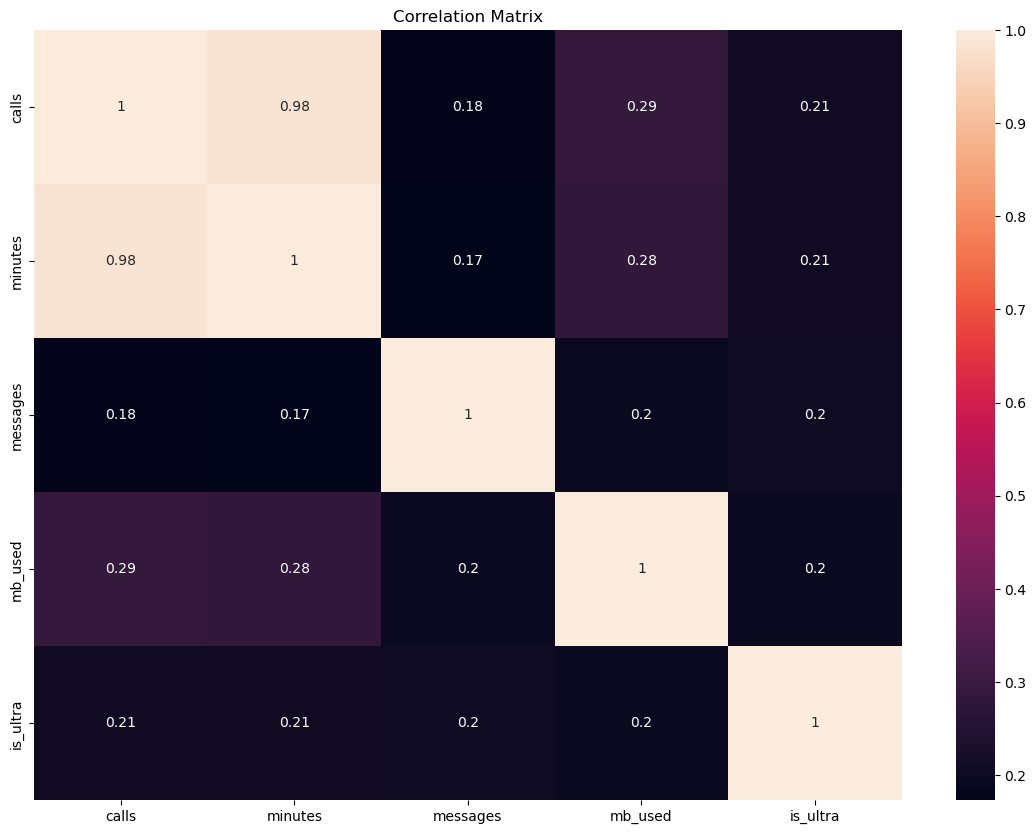

In [58]:
import matplotlib.pyplot as plt

# build and render a correlation matrix
cm = data.corr()  


# plot an annotated heatmap for the correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot = True)

plt.title('Correlation Matrix')

plt.show()

There is a clear high correlation between minutes are number of calls. In order to eliminate possible multicollinearity, I remove "minutes" column.

In [59]:
clean_data = data.drop(['minutes'], axis=1)
clean_data.head()

,calls,messages,mb_used,is_ultra
0,40.0,83.0,19915.42,0
1,85.0,56.0,22696.96,0
2,77.0,86.0,21060.45,0
3,106.0,81.0,8437.39,1
4,66.0,1.0,14502.75,0


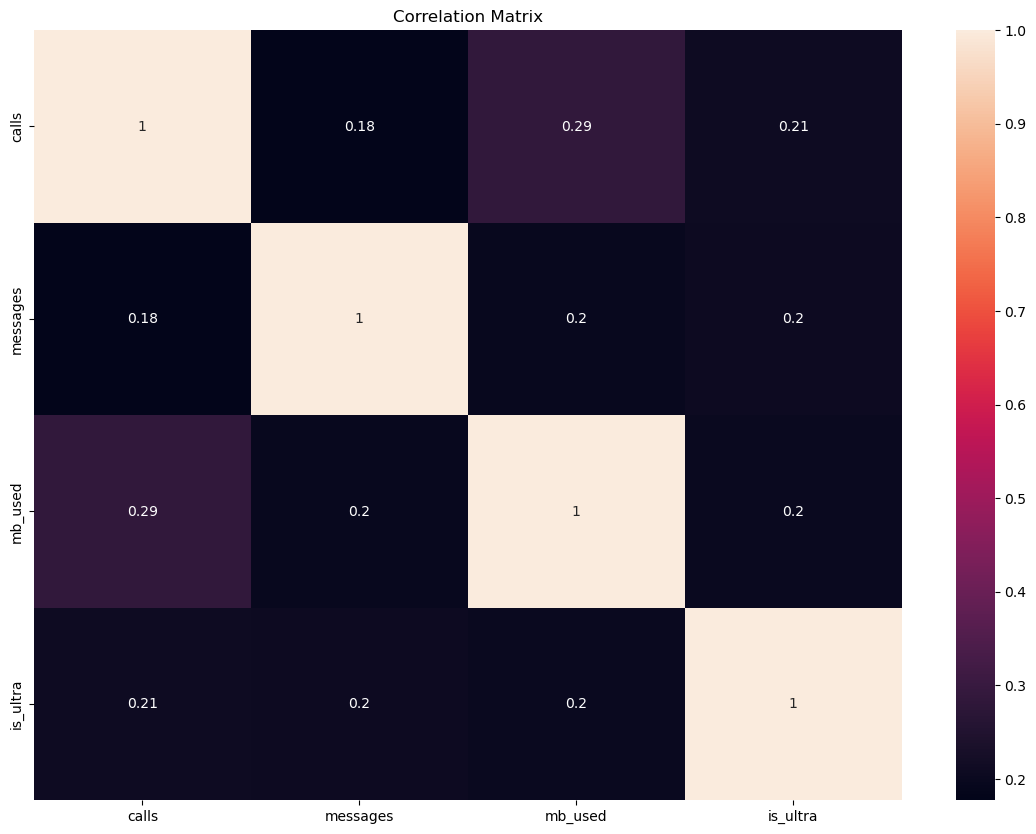

In [60]:
cm1 = clean_data.corr()  


# plot an annotated heatmap for the correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(cm1, annot = True)

plt.title('Correlation Matrix')

plt.show()

Now there is no high correlation between any of the columns.

In [61]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(clean_data, test_size=0.4, random_state=56)
valid_set, test_set = train_test_split(valid, test_size=0.5, random_state=56)

I splt the data in 3 parts - train, valid and test. Train will contain 60% of the data, valid and test parts will contain 20% each.

In [62]:
train.shape

(1928, 4)

In [63]:
valid.shape

(1286, 4)

In [64]:
display(valid_set.shape)
display(test_set.shape)

(643, 4)

(643, 4)

In [65]:
len(train)/len(clean_data)

0.5998755444928439

# Splitting data into  Feature/Target and Test/Validate/Train

In [66]:
# this is in order to drop the column, answers for which we are looking for in the 'features' and only keep this column in the 'target'
features_train = train.drop('is_ultra', axis=1)
target_train = train['is_ultra']
features_valid = valid_set.drop('is_ultra', axis=1)
target_valid = valid_set['is_ultra']
features_test = test_set.drop('is_ultra', axis=1)
target_test = test_set['is_ultra']

# Random Forest Model

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [68]:
#Training model with n_est = 10
final_est = 0
final_score = 0
for n in range(1, 10):
    rfc_model = RandomForestClassifier(random_state=58, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
print("Best number of estimators =", n, "with accuracy:",final_score)

Best number of estimators = 9 with accuracy: 0.7744945567651633


In [69]:
#Training model with n_est = 25
final_est = 0
final_score = 0
for n in range(1, 25):
    rfc_model = RandomForestClassifier(random_state=58, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
print("Best number of estimators =", n, "with accuracy:",final_score)

Best number of estimators = 24 with accuracy: 0.7884914463452566


In [70]:
#Validation test with n_est = 24

rfc_model = RandomForestClassifier(random_state=58, n_estimators=24)
rfc_model.fit(features_valid,target_valid)
valid_pred = rfc_model.predict(features_valid)
accuracy = rfc_model.score(features_valid, target_valid)
print("Final accuracy:",accuracy)

Final accuracy: 0.9937791601866252


In [71]:
#Testing score of Random Forest Model

predictions_test_rfc = rfc_model.predict(features_test)                 
accuracy_test_rfc = accuracy_score(target_test, predictions_test_rfc)    
print("Random Forest testing score:", accuracy_test_rfc)

Random Forest testing score: 0.7916018662519441


I tried 3 different number of estimators in the model and it appears that n=30 is the optimal number of estimators in the model, it provides the  same value for the accuracy score as the n=25 but testing score in much better.

Testing scre of the Random Forest model is 0.794. It is pretty high score which shows that the model can be used by the company. 

In [72]:
list(range(1, 30))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier(random_state=58)
#training on the train
dtc_model=dtc_model.fit(features_train,target_train)

In [74]:
from sklearn import tree

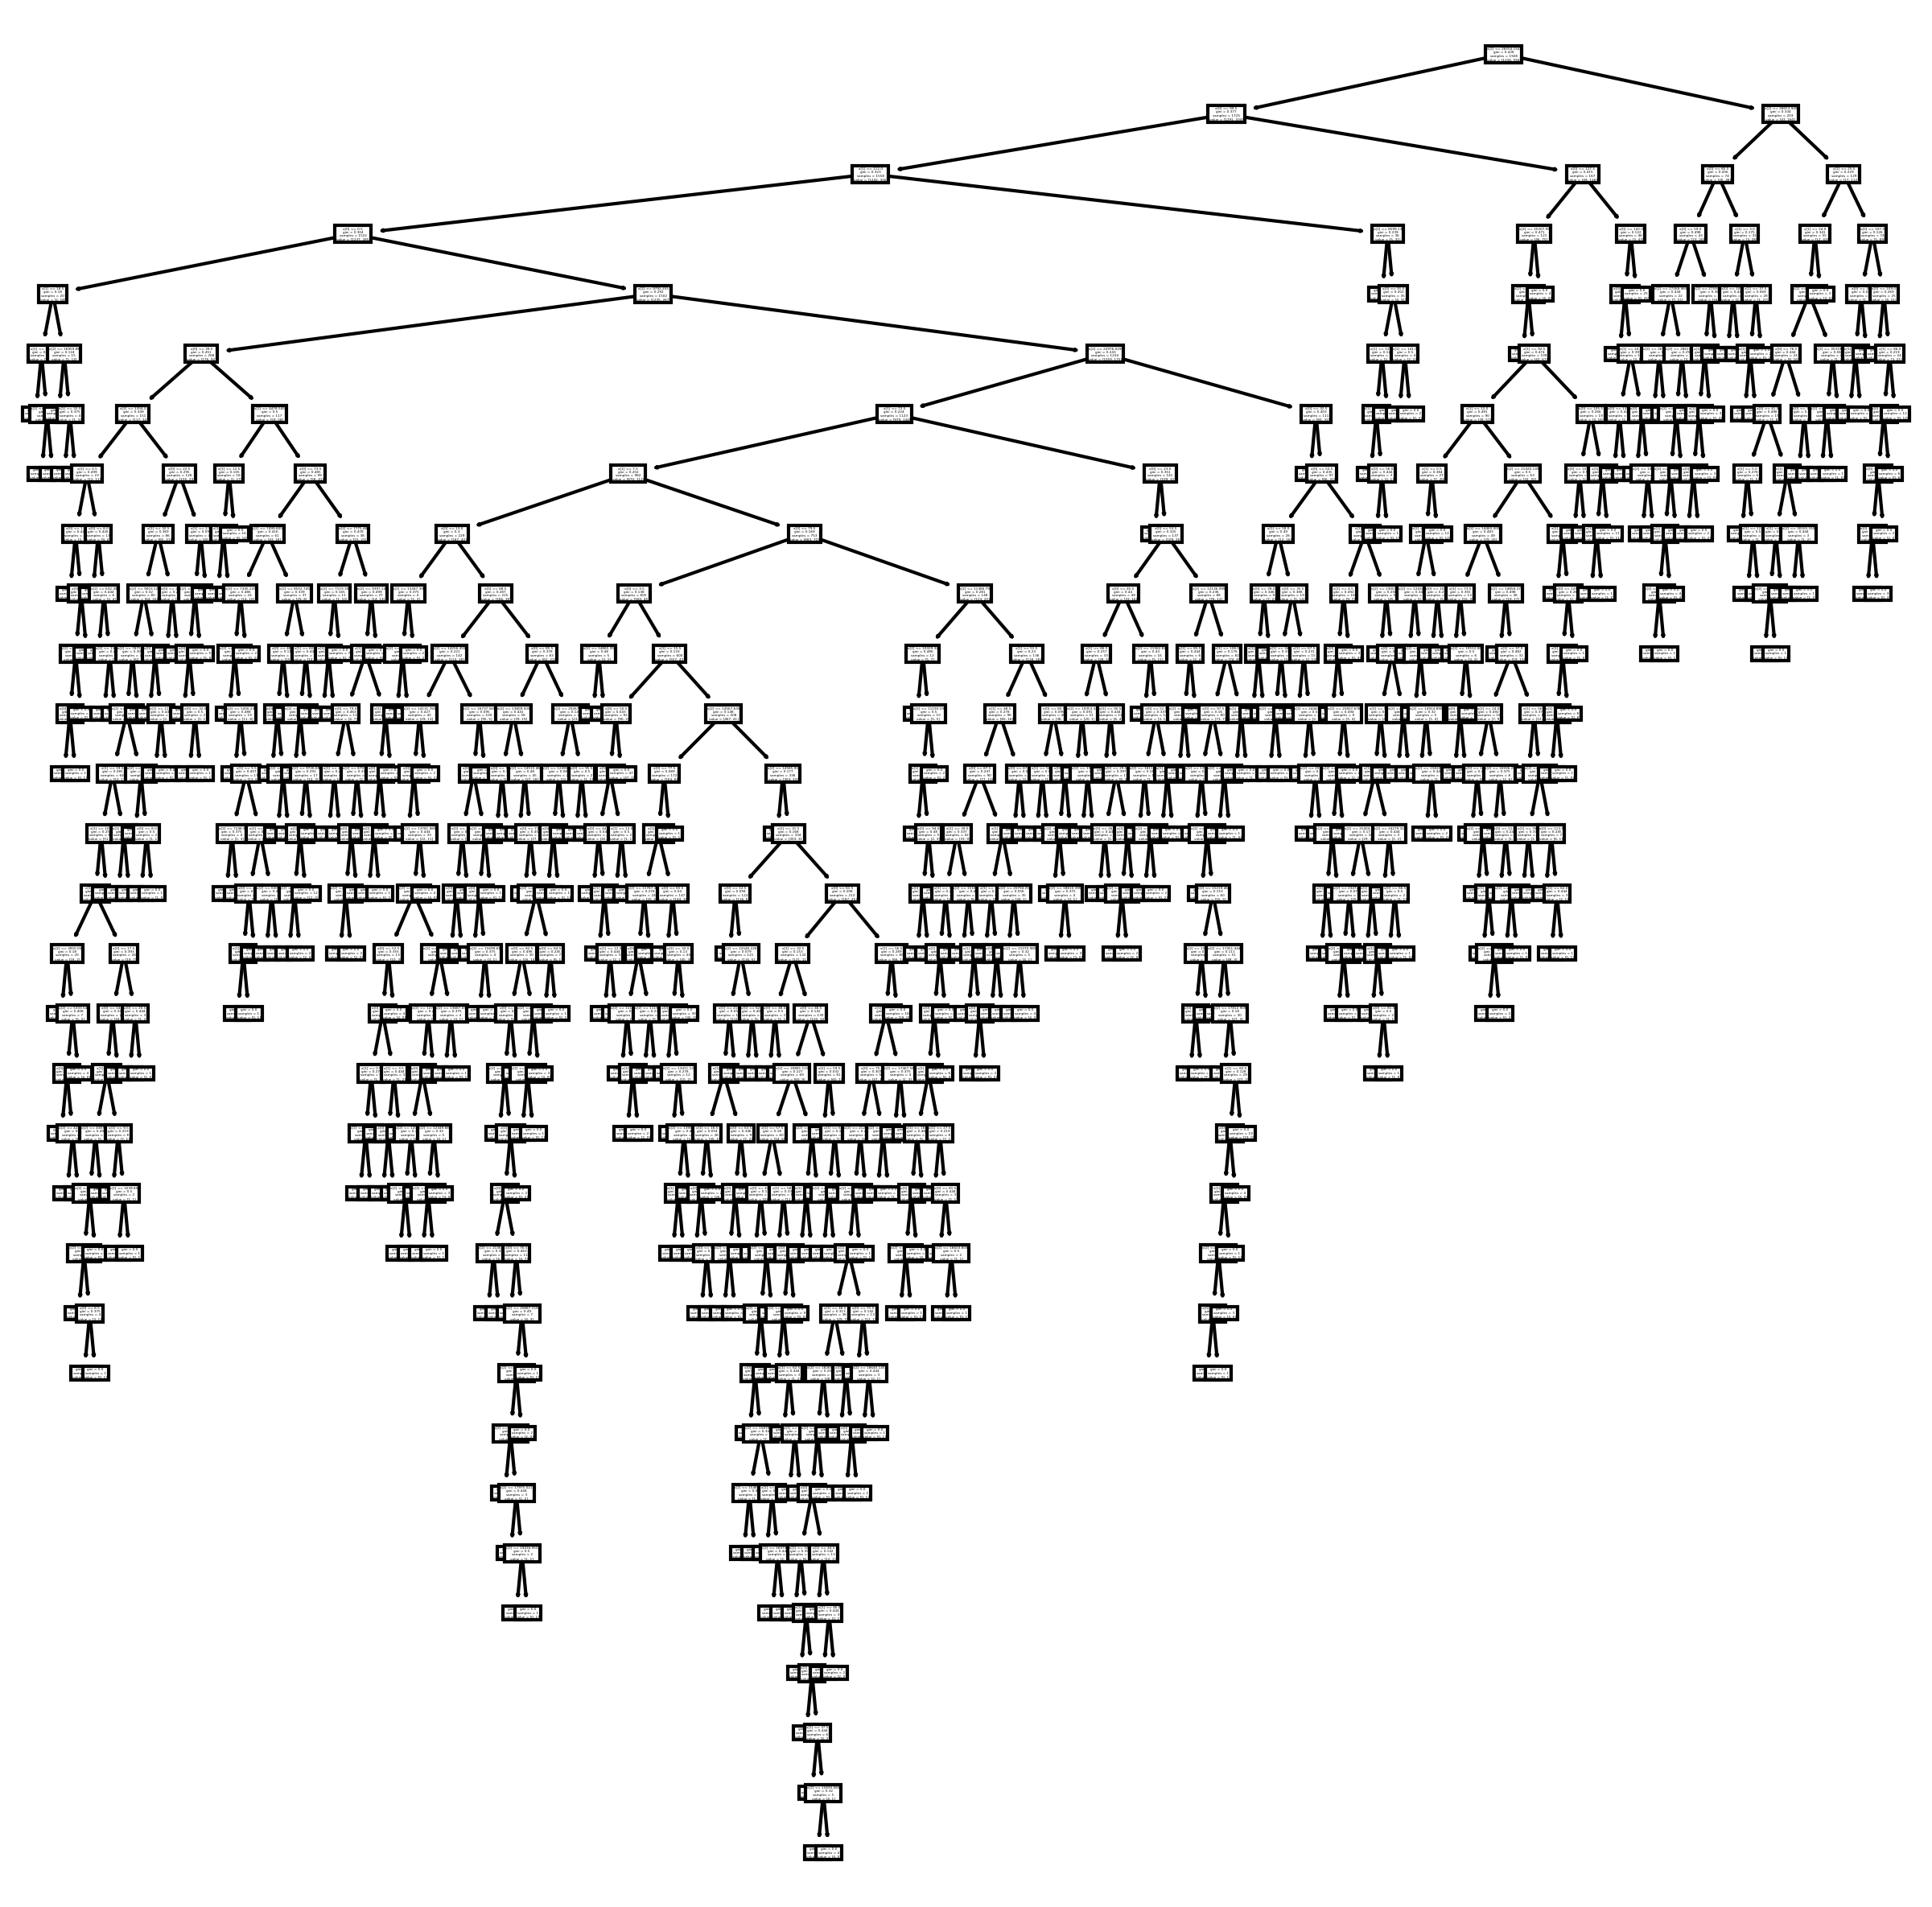

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi = 300)

tree.plot_tree(dtc_model);

Visual representation of the Decision Tree model.

In [76]:
dtc_model.tree_.max_depth

30

30 depth for a Decision Tree model is way too much. I want to make it lower depth whilst mainaining high accuracy.

In [77]:
# depth of 5
final_depth_1 = 0
final_score_1 = 0
for depth in range(1, 5):
    dtc_model = DecisionTreeClassifier(random_state=58, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    if accuracy > final_score_1:
        final_depth_1 = depth
        final_score_1 = accuracy

print("Final depth =", final_depth_1,"with training accuracy:",final_score_1)

Final depth = 4 with training accuracy: 0.7729393468118196


In [78]:
# depth of 10
final_depth = 0
final_score = 0
for depth in range(1, 10):
    dtc_model = DecisionTreeClassifier(random_state=58, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    if accuracy > final_score:
        final_depth = depth
        final_score = accuracy

print("Final depth =", final_depth,"with training accuracy:",final_score)

Final depth = 9 with training accuracy: 0.7838258164852255


In [79]:
# depth of 12
final_depth_2 = 0
final_score_2 = 0
for depth in range(1, 12):
    dtc_model = DecisionTreeClassifier(random_state=58, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    if accuracy > final_score_2:
        final_depth_2 = depth
        final_score_2 = accuracy

print("Final depth =", final_depth_2,"with training accuracy:",final_score_2)

Final depth = 9 with training accuracy: 0.7838258164852255


In [80]:
#Validation test with depth = 9

dtc_model = DecisionTreeClassifier(random_state=58, max_depth=9)
dtc_model.fit(features_train,target_train)
valid_pred = dtc_model.predict(features_valid)
accuracy = dtc_model.score(features_valid, target_valid)
print("Final accuracy:",accuracy)

Final accuracy: 0.7838258164852255


In [81]:
#Testing score of the Decision Tree Model 

predictions_test_dtc = dtc_model.predict(features_test)                 
accuracy_test_dtc = accuracy_score(target_test, predictions_test_dtc)    
print("Decision Tree testing score:", accuracy_test_dtc)

Decision Tree testing score: 0.7962674961119751


It appears that the decision tree with depth of 4 provides the highest test score albeit not the highest accuracy.

Test score of the Decision Tree is 0.784. Pretty good score but lower than the score of the Random Forest model.

## Linear Regression Model

In [82]:
#Training model with solver = 'liblinear'
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=58, solver='liblinear')
lr_model.fit(features_train,target_train)
score = lr_model.score(features_valid, target_valid)
print("Logistic regression training score:", score)

Logistic regression training score: 0.7293934681181959


In [83]:
#Training model with solver = 'lbfgs'
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=58, solver='lbfgs')
lr_model.fit(features_train,target_train)
score = lr_model.score(features_valid, target_valid)
print("Logistic regression training score:", score)

Logistic regression training score: 0.7309486780715396


In [84]:
#Training model with solver = 'newton-g'
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=58, solver='newton-cg')
lr_model.fit(features_train,target_train)
score = lr_model.score(features_valid, target_valid)
print("Logistic regression training score:", score)

Logistic regression training score: 0.7309486780715396


In [85]:
#As both lbfgs and newton-cg provides the same training score, I will use lbfgs in the validation test

lr_model = LogisticRegression(random_state=58, solver='lbfgs')
lr_model.fit(features_train,target_train)
valid_pred = lr_model.predict(features_valid)
accuracy = lr_model.score(features_valid, target_valid)
print("Final accuracy:",accuracy)

Final accuracy: 0.7309486780715396


In [86]:
#Testing score of Linear Regression Model

predictions_test_lr = lr_model.predict(features_test)                 
accuracy_test_lr = accuracy_score(target_test, predictions_test_lr)    
print("Logistic regression testing score:", accuracy_test_lr)

Logistic regression testing score: 0.7573872472783826


Test score of the Linear Regression model is 0.754, which is the lowest value out of three different models. 

# Conclusion

In [87]:
print("Random Forest testing score:", accuracy_test_rfc)

print("Decision tree testing score:", accuracy_test_dtc)

print("Logistic regression testing score:", accuracy_test_lr)

Random Forest testing score: 0.7916018662519441
Decision tree testing score: 0.7962674961119751
Logistic regression testing score: 0.7573872472783826


As Decision Tree Model provides the highest score out of 3 models, mobile carrier should consider using it in order to get the most accurate choice of a plan for each customer. 